# Importing Libraries 


pandas: Library used for manipulation and analysis of tabular data

seaborn: Library used for statistical data visualization

numpy: Library used for scientific computation and array manipulation

matplotlib: Library used for plotting graphs

sklearn.decomposition.PCA: Library used for dimensionality reduction

sklearn.preprocessing.StandardScaler: Library used for feature standardization for machine learning modeling.

To meet the task requirements, I started by importing the necessary libraries for the job and will proceed with reading the dataset to characterize it. Next, I will apply data preparation methods and EDA (Exploratory Data Analysis) visualization techniques. Finally, I will use Principal Component Analysis (PCA) for dimensionality reduction and explain the Curse of Dimensionality, including my conclusions from the analyses conducted at the end of the task

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.image as plt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px


# Loading the file 

Reading the data set file

In [71]:
df=pd.read_csv("listings.csv")

# Characterisation of the data set


I will perform data characterization in Python to understand the essential characteristics of the data, such as examining the dimensions of the dataset, identifying types of variables present, exploring statistics, among others. The analyses conducted will be detailed below.

# Head 

Viewing the dataset columns 

Viewing the first 5 rows in a dataset of 37 columns

In [72]:
df.head ()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


# Shape 

Viewing the dataset size

In this dataset we have 7907 rows and 16 columns

In [73]:
df.shape

(7907, 16)

# Info

A concise and informative summary of the set, including information about data types, the number of non-null entries, and the amount of memory used.



In [74]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

# Understanding dataset 

Bringing in the statistical data from the dataset

In [75]:
df.describe ()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


Bringing in the statistical data by object

In [76]:
df.describe(include="object")

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


Identifying Null Values in Data Set

# Identifying missing values

In [77]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [78]:
df.isnull().sum().sum()

5518

a list with all missing value formats

In [79]:
m_v_f = ["n.a", ",", "?", "NA", "n/a", "na", "--"]

In [80]:
df = pd.read_csv("listings.csv", na_values=m_v_f)

In [81]:
df.isnull().sum().sum()

5518

During the analysis, it was identified that 5518 missing values were present. The variable m_v_f contains a list of strings that can be interpreted as representations of missing values in the dataset.

In [82]:
df.head ()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


# Missing values handling _ Data cleaning


Missing values handling refers to the process of dealing with missing/null values in a dataset. In this task, we use three approaches, namely:

Imputation Models:Rather than using basic statistics to replace missing values, these models predict missing values based on other variables in the datase

Imputation:Replaces missing values with calculated values. This can be done using simple statistics like mean, median, or mode, or through more advanced techniques like regression or machine learning models.

Removal of Rows or Columns): Removes observations or variables that contain missing values.



As colunas last_review and reviews_per_month não serão utilizadas, portanto, elas serao excluidas

# Drop missing values columns

In [83]:
df = df.drop(['last_review', 'reviews_per_month', 'name', "id", "host_name", "host_id"], axis=1)

Checking missing values 

In [84]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


In [85]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [86]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   object 
 1   neighbourhood                   7907 non-null   object 
 2   latitude                        7907 non-null   float64
 3   longitude                       7907 non-null   float64
 4   room_type                       7907 non-null   object 
 5   price                           7907 non-null   int64  
 6   minimum_nights                  7907 non-null   int64  
 7   number_of_reviews               7907 non-null   int64  
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 617.9+ KB


In [87]:
df.isnull().sum().sum()

0

In [88]:
df.nunique()

neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
calculated_host_listings_count      55
availability_365                   359
dtype: int64

Viewing the size of the data set after cleaning

In [89]:
df.shape

(7907, 10)

# Checking for duplicates

Identifying if there are duplicated data entries in the dataset

In [90]:
duplicates = df.duplicated()
print(df[duplicates])

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
7902      Central Region    Queenstown   1.27973  103.78751  Entire home/apt   

      price  minimum_nights  number_of_reviews  \
7902    100               3                  0   

      calculated_host_listings_count  availability_365  
7902                              31                61  


Checking the Number of Duplicate Rows

In [91]:
df.drop_duplicates()
df.shape

(7907, 10)

# DATA EXPLORATION

# Processing the database for data exploration

# Renomeando em coluna

Renaming the columns for better visualization of the data

In [92]:
df.head ()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


# Data Exploration

In [93]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

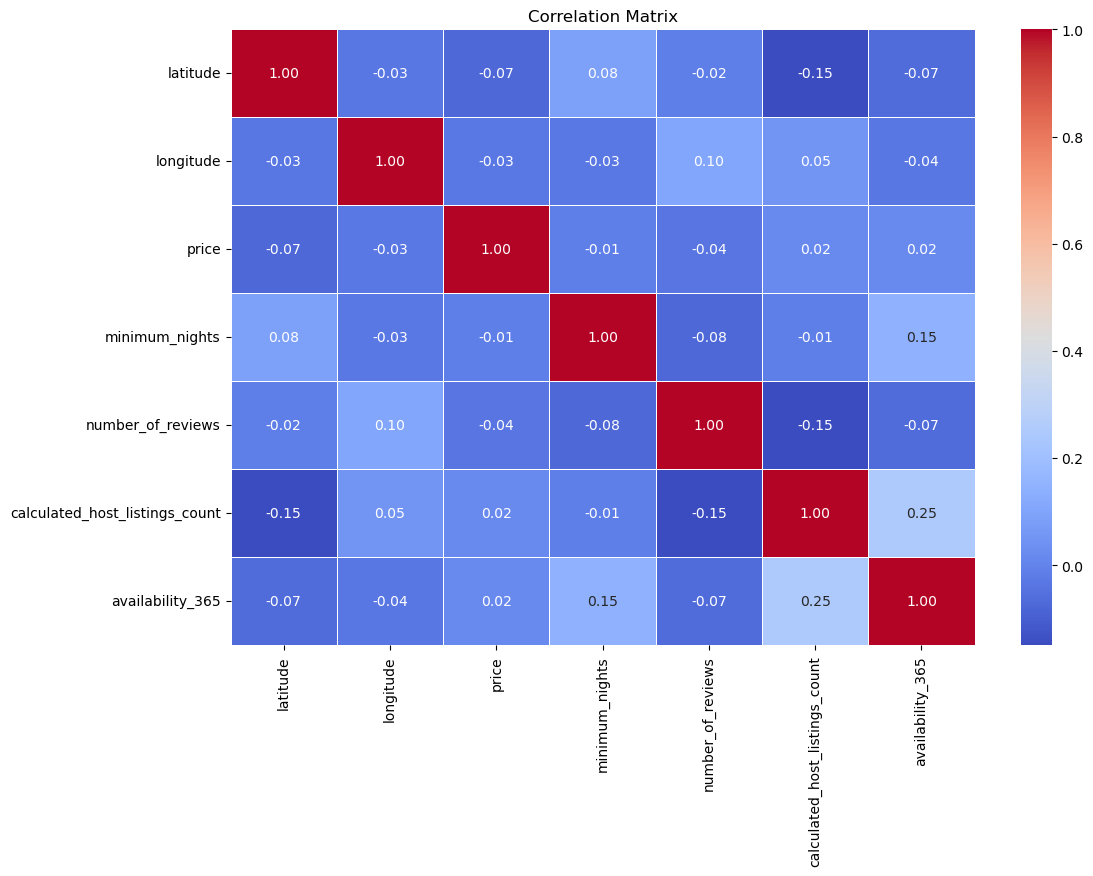

In [94]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
df.head ()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


# Define the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create a figure and a set of axes with the desired number of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Select only the numeric columns for plotting
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate over the numeric columns you want to plot
for i, column in enumerate(numeric_columns[:num_rows*num_cols]):
    row = i // num_cols
    col = i % num_cols
    sns.residplot(x=df[column], y=df['price'], lowess=True, ax=axes[row, col],
                  scatter_kws={'alpha': 0.5, 's': 25}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    axes[row, col].set_title(column)
    axes[row, col].set_xlim(df[column].min(), df[column].max())  # Set x-axis limits
    axes[row, col].set_ylim(df['price'].min(), df['price'].max())  # Set y-axis limits

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plots
plt.show()



C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_436\1837268178.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



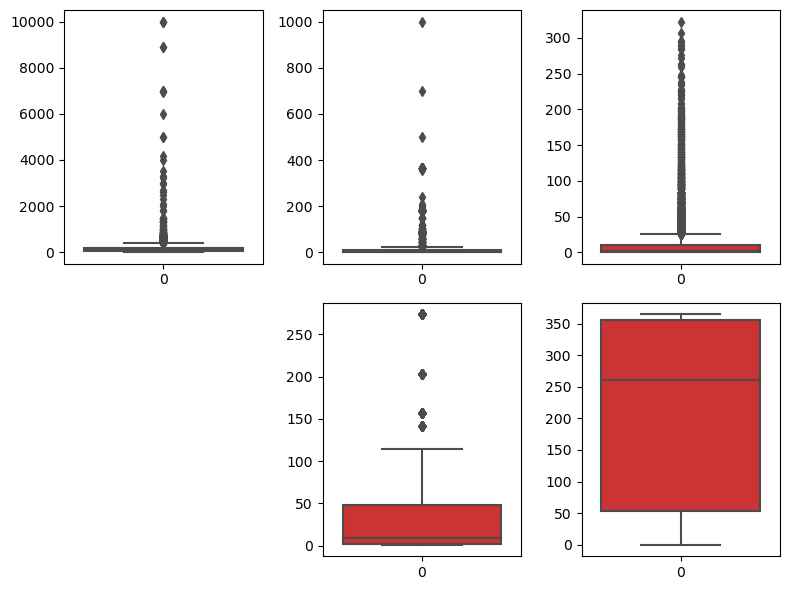

In [105]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(df['price'])

subplot(2,3,2)
sns.boxplot(df['minimum_nights'])

subplot(2,3,3)
sns.boxplot(df['number_of_reviews'])
subplot(2,3,5)
sns.boxplot(df['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(df['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

In [97]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [98]:
df.head ()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


In [99]:
# Assuming df is your DataFrame containing the data
neighborhood_counts = df['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'count']

fig = go.Figure(go.Bar(
    x=neighborhood_counts['neighbourhood'], y=neighborhood_counts['count'],
    marker={'color': neighborhood_counts['count'], 'colorscale': 'Viridis'},  
    text=neighborhood_counts['count'],
    textposition="outside",
))
fig.update_layout(xaxis_title="Neighbourhood", yaxis_title="Count")
fig.show()

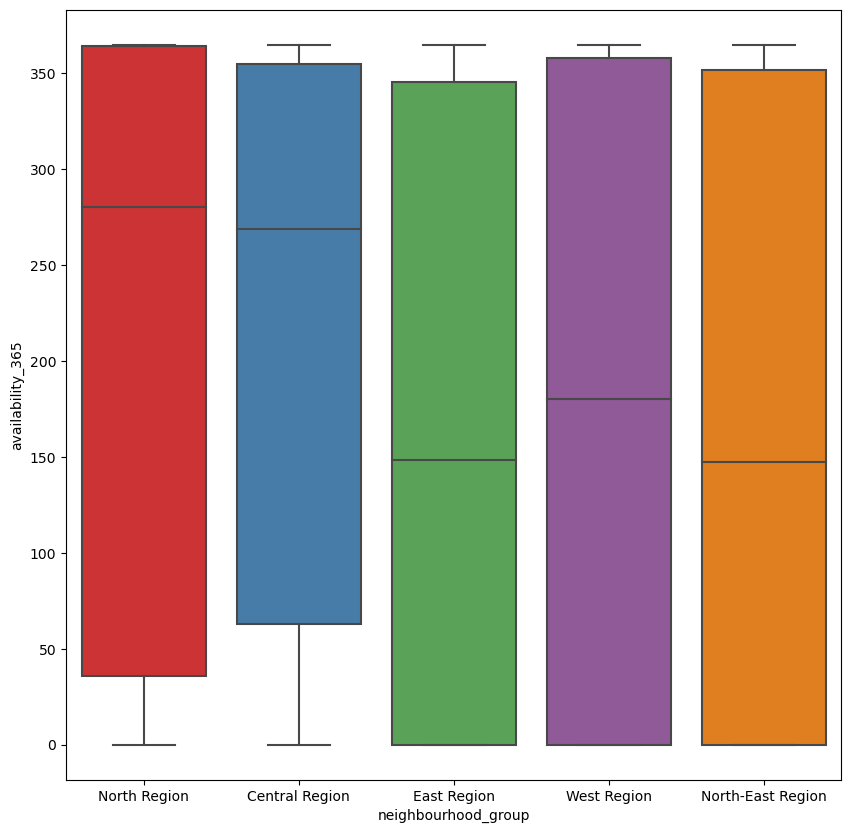

In [100]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')

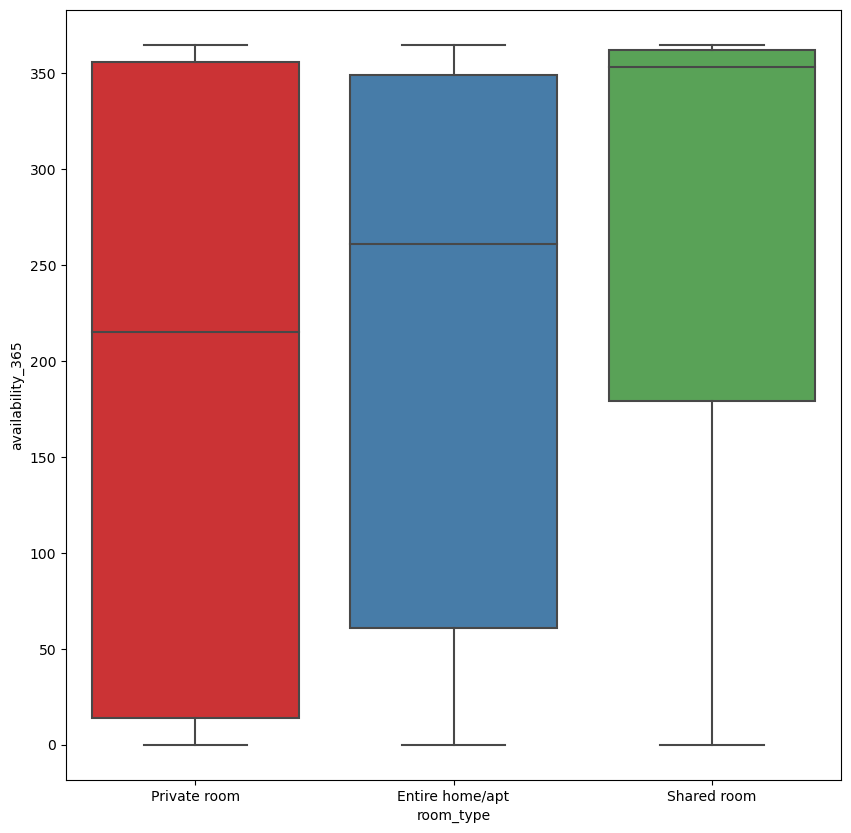

In [101]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='room_type',y='availability_365')

In [106]:
df.head ()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


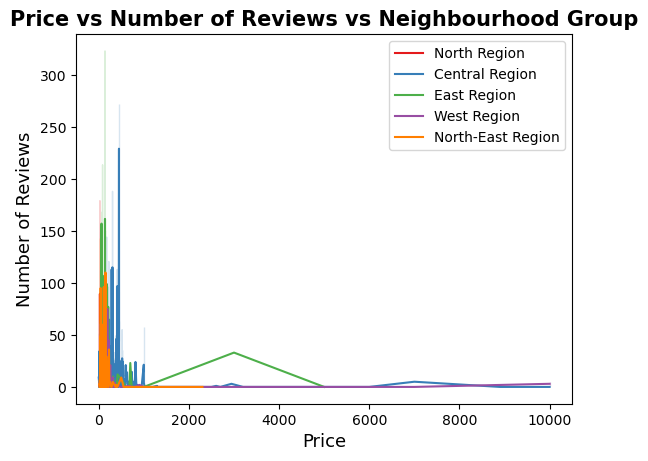

In [107]:
# Set the color palette
sns.set_palette("Set1")

# Plot a line for each region with different line styles
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='North Region'],
             label='North Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Central Region'],
             label='Central Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='East Region'],
             label='East Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='West Region'],
             label='West Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='North-East Region'],
             label='North-East Region')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Jurong West'],
             label='Jurong West')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Museum'],
             label='Museum')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Rochor'],
             label='Rochor')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Sembawang'],
             label='Sembawang')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Orchard'],
             label='Orchard')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Downtown Core'],
             label='Downtown Core')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Southern Islands'],
             label='Southern Islands')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Punggol'],
             label='Punggol')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Bukit Merah'],
             label='Bukit Merah')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Hougang'],
             label='Hougang')

# Define the labels for axes and the title of the plot
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group", size=15, weight='bold')

# Show the plot
plt.show()

In [138]:
fig = px.scatter(df, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

In [116]:
feature_columns=['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365','latitude', 'longitude']

In [117]:
new_df=df[feature_columns]
new_df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,latitude,longitude
0,North Region,Private room,83,180,2,365,1.44255,103.79580
1,Central Region,Private room,81,90,1,365,1.33235,103.78521
2,North Region,Private room,69,6,2,365,1.44246,103.79667
3,East Region,Private room,206,1,9,353,1.34541,103.95712
4,East Region,Private room,94,1,9,355,1.34567,103.95963


In [118]:
new_df['room_type']=new_df['room_type'].factorize()[0]
new_df['neighbourhood_group']=new_df['neighbourhood_group'].factorize()[0]

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_436\2732932372.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_436\2732932372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
new_df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,latitude,longitude
0,0,0,83,180,2,365,1.44255,103.79580
1,1,0,81,90,1,365,1.33235,103.78521
2,0,0,69,6,2,365,1.44246,103.79667
3,2,0,206,1,9,353,1.34541,103.95712
4,2,0,94,1,9,355,1.34567,103.95963


In [120]:
new_df.shape

(7907, 8)

# Train test e Split 

In [122]:
X = new_df[['neighbourhood_group', 'room_type', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']]
y = new_df['price']